In [1]:
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import os
import PIL

In [5]:
import cv2 as cv

In [3]:
path = 'DevanagariHandwrittenCharacterDataset/Train/'
files = os.listdir(path)
files

['character_10_yna',
 'character_11_taamatar',
 'character_12_thaa',
 'character_13_daa',
 'character_14_dhaa',
 'character_15_adna',
 'character_16_tabala',
 'character_17_tha',
 'character_18_da',
 'character_19_dha',
 'character_1_ka',
 'character_20_na',
 'character_21_pa',
 'character_22_pha',
 'character_23_ba',
 'character_24_bha',
 'character_25_ma',
 'character_26_yaw',
 'character_27_ra',
 'character_28_la',
 'character_29_waw',
 'character_2_kha',
 'character_30_motosaw',
 'character_31_petchiryakha',
 'character_32_patalosaw',
 'character_33_ha',
 'character_34_chhya',
 'character_35_tra',
 'character_36_gya',
 'character_3_ga',
 'character_4_gha',
 'character_5_kna',
 'character_6_cha',
 'character_7_chha',
 'character_8_ja',
 'character_9_jha',
 'digit_0',
 'digit_1',
 'digit_2',
 'digit_3',
 'digit_4',
 'digit_5',
 'digit_6',
 'digit_7',
 'digit_8',
 'digit_9']

In [4]:
X = []
Y = []
for cl in files:
    pth = path+cl
    for img in os.listdir(pth):
        img = cv.imread(pth+"/"+img,0)
        X.append(img)
        Y.append(cl)

In [5]:
Testpath = 'DevanagariHandwrittenCharacterDataset/Test/'
Testfiles = os.listdir(Testpath)
Testpath
for cl in Testfiles:
    pth = Testpath+cl
    for img in os.listdir(pth):
        img = cv.imread(pth+"/"+img,0)
        X.append(img)
        Y.append(cl)

In [11]:
X.shape

(92000, 32, 32)

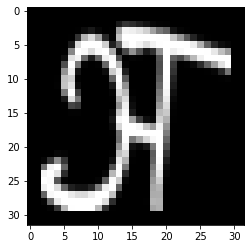

In [7]:
le = LabelEncoder()
Y = le.fit_transform(Y)
X = np.array(X)
Y = np.array(Y)
plt.imshow(X[0],cmap = 'gray')

In [8]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape = (32,32,1),padding='same'),
    keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'),
    keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same'),
    keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation ='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(46,activation ='softmax')
])

In [9]:
X = X.reshape(len(X),32,32)/255

In [10]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [9]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [10]:
X_train.shape

(73600, 32, 32)

In [12]:
model.fit(X_train,Y_train,epochs = 10)

Epoch 1/10
2300/2300 [==============================] - 301s 130ms/step - loss: 0.7838 - accuracy: 0.7750
Epoch 2/10
2300/2300 [==============================] - 270s 118ms/step - loss: 0.1863 - accuracy: 0.9443
Epoch 3/10
2300/2300 [==============================] - 289s 126ms/step - loss: 0.1315 - accuracy: 0.9608
Epoch 4/10
2300/2300 [==============================] - 735s 320ms/step - loss: 0.1051 - accuracy: 0.9687
Epoch 5/10
2300/2300 [==============================] - 278s 121ms/step - loss: 0.0915 - accuracy: 0.9727
Epoch 6/10
2300/2300 [==============================] - 290s 126ms/step - loss: 0.0792 - accuracy: 0.9758
Epoch 7/10
2300/2300 [==============================] - 610s 265ms/step - loss: 0.0723 - accuracy: 0.9781
Epoch 8/10
2300/2300 [==============================] - 279s 121ms/step - loss: 0.0675 - accuracy: 0.9796
Epoch 9/10
2300/2300 [==============================] - 288s 125ms/step - loss: 0.0604 - accuracy: 0.9821
Epoch 10/10
2300/2300 [=======================

In [13]:
loss,acc = model.evaluate(X_test,Y_test)
print(acc,loss)

575/575 [==============================] - 21s 31ms/step - loss: 0.0473 - accuracy: 0.9872
0.9871739149093628 0.04733218252658844


In [2]:
labels = ['character_10_yna','ट ','character_12_thaa','ड','ध','ण','त','थ','द','ध','क','न','प','फ','ब',
          'भ','म','य','र','ल','व','ख','श','ष','स','ह','क्ष','त्र','ज्ञ','ग','घ','character_5_kna','च','छ',
          'ज','झ','०','१','२','३','४','५','६','७','८','९']

In [3]:
model = tf.keras.models.load_model('AksharCnnNew')

1/1 [==============================] - 0s 61ms/step
Prediction:र
confidence:0.9996713399887085


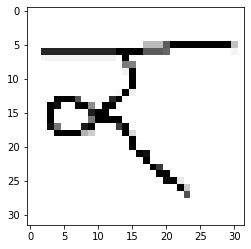

In [11]:
original_image = cv.imread('maPaint.png')
resized_image = cv.resize(original_image, (32, 32))
grayscale_image = cv.cvtColor(resized_image, cv.COLOR_BGR2GRAY)
grayscale_image = np.invert(np.array(grayscale_image))/255
plt.imshow(grayscale_image, cmap = plt.cm.binary)
grayscale_image = np.array([grayscale_image])
pred = model.predict(grayscale_image)

if np.max(pred)> 0.9:
    print(f'Prediction:{labels[np.argmax(pred)]}')
elif 0.9>np.max(pred)> 0.5:
     print(f'Is it {labels[np.argmax(pred)]} ?')
else:
    print('Unknown character')
print(f'confidence:{np.max(pred)}')

In [102]:
model.save('AksharCnnNew')


INFO:tensorflow:Assets written to: AksharCnnNew\assets


INFO:tensorflow:Assets written to: AksharCnnNew\assets


In [ ]:
model = tf.keras.models.load_model('aksharCnn.model')